# Is Uni Worth It *at least in the US, Where there it's called College, so are American Colleges worth it 

Analysing the WSJ's dataset: "where college pays" 

In [11]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ImportError: No module named decorators

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [61]:
import matplotlib

saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Why am I doing this? No seriously why?

I want to discover what (at least in the US) the disparities are between the nations colleges when it concerns the salaries of their graduates careers.

And also what are the "worthless" degrees *cough cough those arts ones

THIS IS IMPORTANT
1. We are university students which is like a college student
2. We are looking into future careers
3. I want to discover whether common sterotypes are true
4. Can we see any trend, how positive is the future for students (which are     you)

Things To Know

1. College =/ University (colleges work like single faculties)
2.
3.

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

college_filepath = "salaries-by-college-type.csv"
degree_filepath = "degrees-that-pay-back.csv"
region_filepath = "salaries-by-region.csv"

college_data = pd.read_csv(college_filepath)
degree_data = pd.read_csv(degree_filepath)
region_data = pd.read_csv(region_filepath)
print "done"

done


In [58]:
for col in list(degree_data.columns[1:]):
    degree_data[col] = degree_data[col].apply(money_to_float)

In [59]:
college_data.columns

Index([u'School Name', u'School Type', u'Starting Median Salary',
       u'Mid-Career Median Salary', u'Mid-Career 10th Percentile Salary',
       u'Mid-Career 25th Percentile Salary',
       u'Mid-Career 75th Percentile Salary',
       u'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [32]:
def money_to_float(bad):
    if type(bad) == str:
        return float(bad[1:].replace(",",""))
    else:
        return bad

for col in list(college_data.columns[2:]):
    college_data[col] = college_data[col].apply(money_to_float)
    

college_data.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


Average salary based on the type of US college, thst is, what did most graduates leaving certain schools recieve as their starting salary. Bascially what I am intrested in here is do hirers discriminate based on preconceived notions of prestigious schools.

In [33]:
for col in list(degree_data.columns[1:]):
    degree_data[col] = degree_data[col].apply(money_to_float)
    
degree_data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


We can see here a more specified list that pertains to all colleges but with the degree as the defining feature, my aim here is to discover the coveted "worthless" degrees.

In [34]:
for col in list(region_data.columns[2:]):
    region_data[col] = region_data[col].apply(money_to_float)
    
region_data.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


And finally we see the same prinicipals applied but instead we can compare the differences in regional areas. The coasts are most predominant, known to be the economic centres of the nation, so how drastically will that variable affect graduate's salaries

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbacc5f2850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbacb6c2190>]], dtype=object)

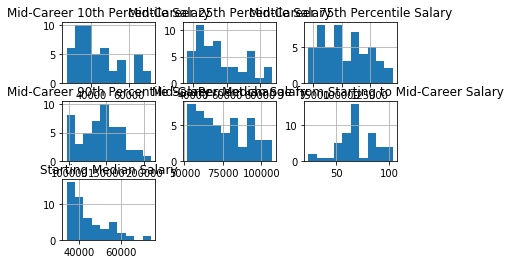

In [44]:
degree_data.hist()

TypeError: cannot concatenate 'str' and 'float' objects

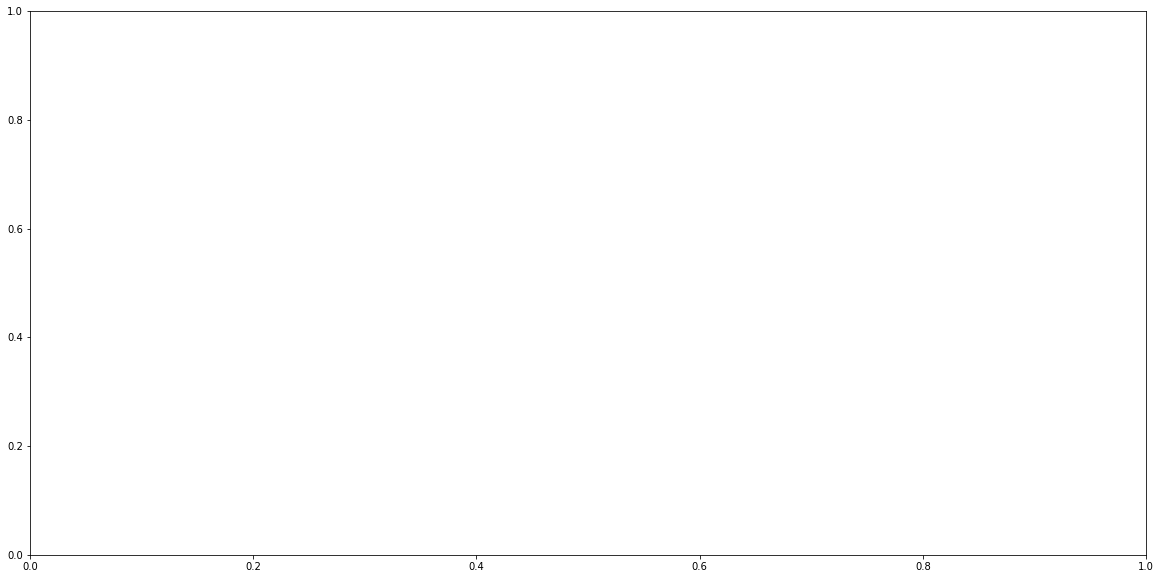

In [63]:
region_data["Mid-Career Median Salary"].hist()

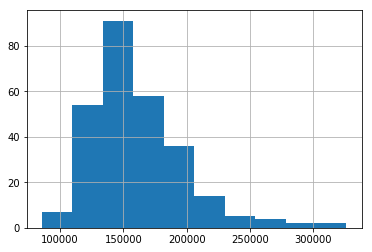

In [36]:
region_data["Mid-Career 90th Percentile Salary"].hist()

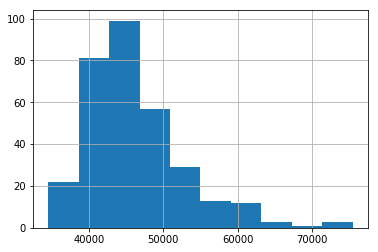

In [37]:
region_data["Starting Median Salary"].hist()

do graphs showing the change from the 1st to last percientile, are the changes for each the same percentage of change, if not how does that end up affecting the numbers

In [46]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure()
<matplotlib.figure.Figure at 0x7fbbcce34ba8>
dd.plot.bar(colormap='Greens')
<matplotlib.axes._subplots.AxesSubplot at 0x7fbbcbc016a0>

SyntaxError: invalid syntax (<ipython-input-46-80e162d202b5>, line 4)

In [53]:
region_data["region"].value_counts()

KeyError: 'region'

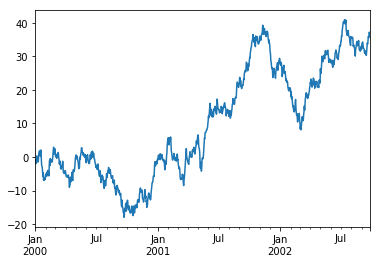

In [39]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot() 

In [40]:
a = burbs.iloc[0]
print a
a.geometry

NameError: name 'burbs' is not defined

In [ ]:
row_one = college_data.iloc[1]
row_one

Series objects are _very_ similar to dictionaries. They have more properties though.

assigning row_one to equal the penalty data.iloc iloc is a pandas thing

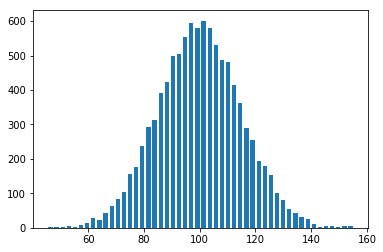

In [41]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
hist, college_data = np.histogram(x, bins=50)
width = 0.7 * (college_data[1] - college_data[0])
center = (college_data[:-1] + college_data[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

# Making plots nice

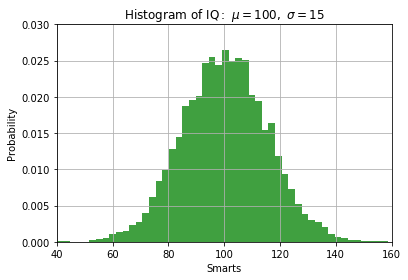

In [12]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

In [13]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

And this is how we'd change it so that we can add more features:

In [14]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

NameError: name 'penalty_data' is not defined

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [15]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

NameError: name 'penalty_data' is not defined

We can go back to our initial, unfiltered, data:

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [ ]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

# _S'pose That's It Then_